# FCIM.M.IA - Artificial Intelligence

> **Lab 3:** Linear Regression\\
> **Performed by:** Astafi Valentina, group TI-231M \\
> **Verified by:** Mihail Gavrilita, asist. univ.

## Imports and Utils

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import Image

## Task 1 -- Import your data. Analyze it via common statistical approaches. Cleanse the data if necessary.

In [6]:
file_path = "/Users/astafivalentina/PycharmProjects/AILabs/4.LinearRegression/apartmentComplexData.csv"

def load_and_process_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            split_line = line.strip().strip('"').split(',')
            data.append([float(item) for item in split_line])

    column_names = ['longitude', 'latitude', 'complexAge', 'totalRooms', 'totalBedrooms',
                    'complexInhabitants', 'apartmentsNr', 'otherFeature', 'medianCompexValue']

    data_set = pd.DataFrame(data, columns=column_names)

    return data_set

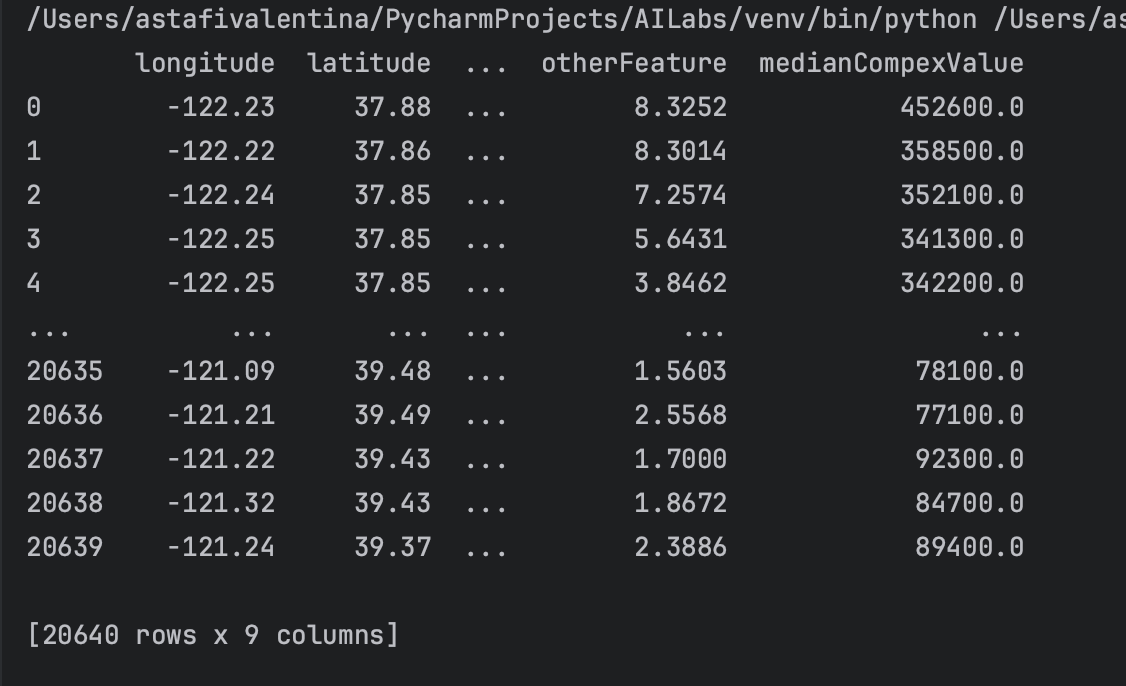

In [7]:
Image(filename="./results/1.png")

In [8]:
def display_interested_data(data_set):
    # Select only the columns of interest
    interested_columns = ['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr',
                          'medianCompexValue']
    data_set_interest = data_set[interested_columns]

    # Display the first few rows of the DataFrame with only the interested columns
    print(data_set_interest)

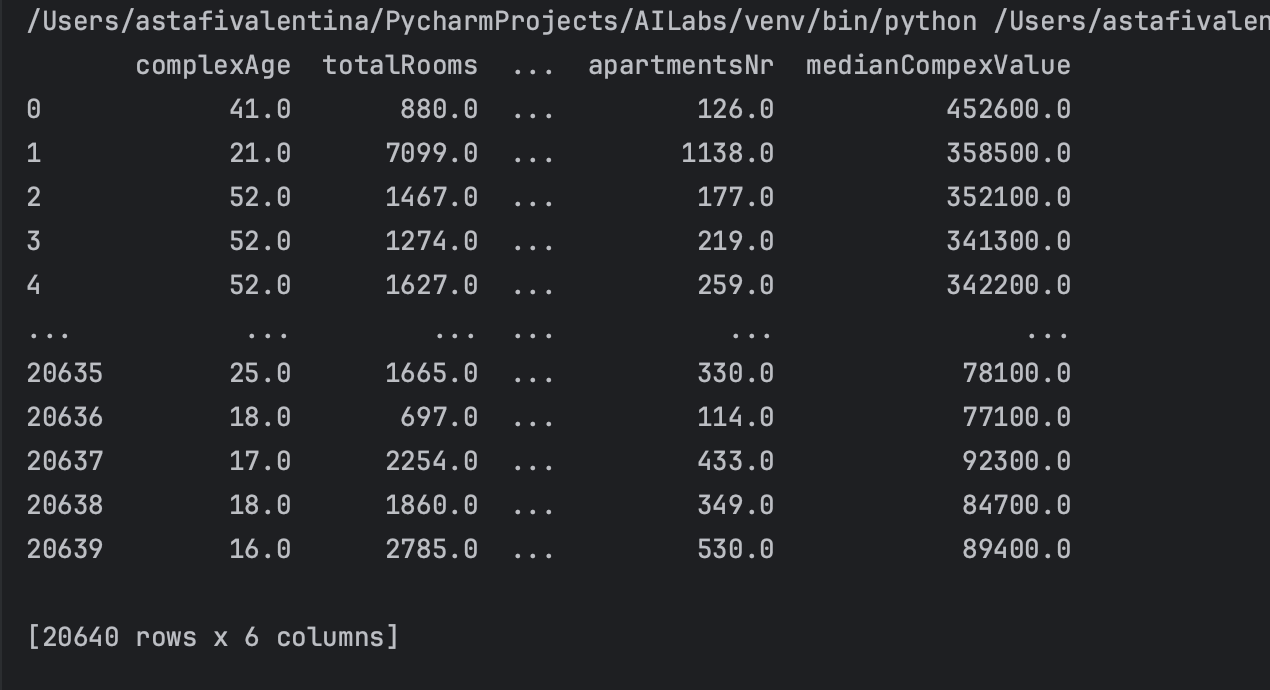

In [9]:
Image(filename="./results/2.png")

In [10]:
def analyze_data(data_set):
    # Pandas describe() is used to view some basic statistical details of a data frame
    print(data_set.describe())

    # Check for missing values in the dataset
    print(data_set.isnull().sum())

    # Pandas info() function is used to get a concise summary of the dataframe.
    print(data_set.info())

    interested_columns = ['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr',
                          'medianCompexValue']

    plot_pairplot(data_set, interested_columns)
    plot_heatmap(data_set, interested_columns)
    plot_distribution(data_set, interested_columns)
    plot_boxplot(data_set, interested_columns)

    return data_set

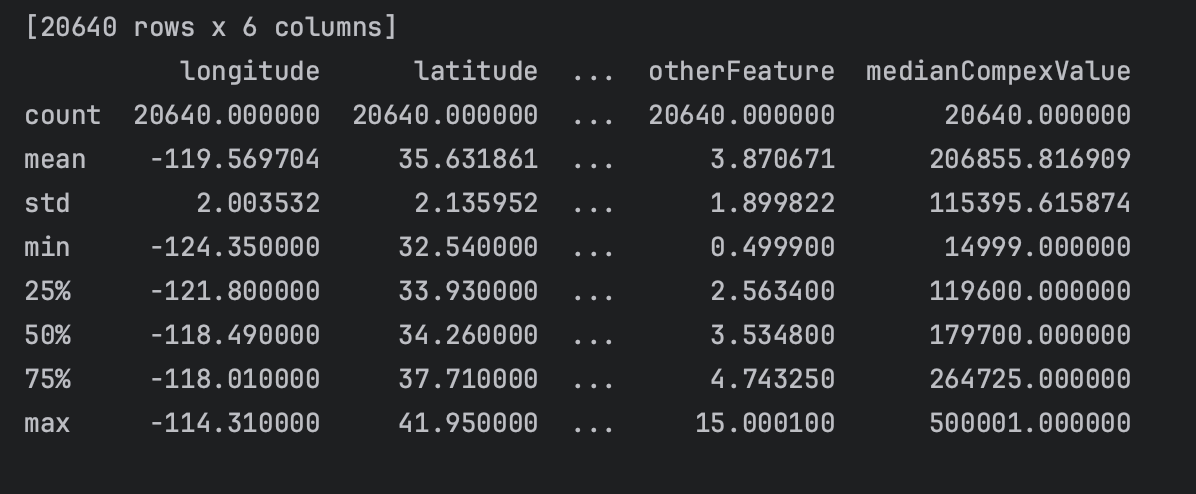

In [14]:
Image(filename="./results/3.png") # Pandas describe() function

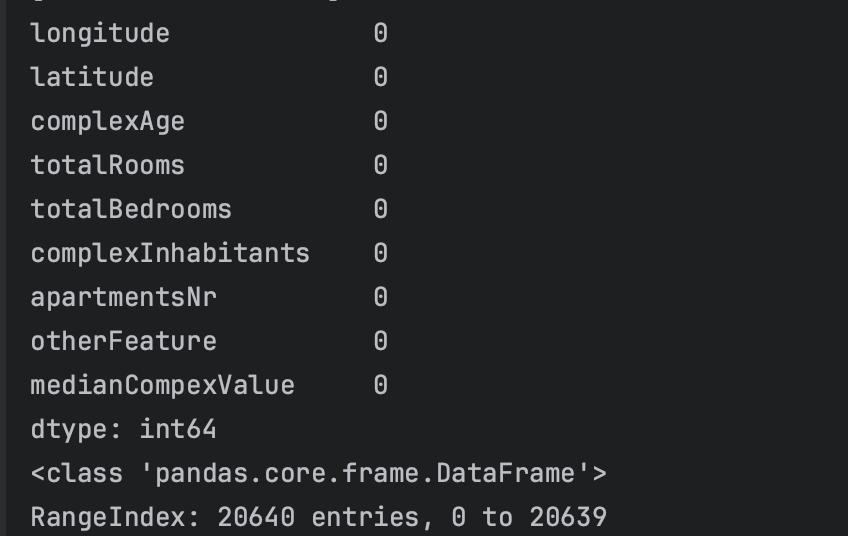

In [15]:
Image(filename="./results/4.png")  # Check for missing values in the dataset

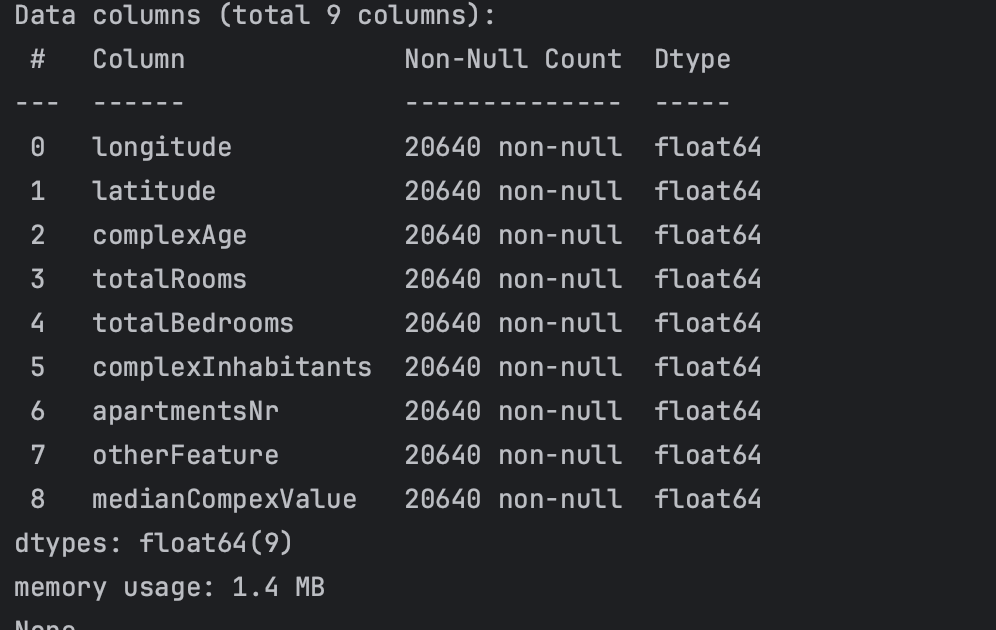

In [16]:
Image(filename="./results/5.png")  # Pandas info() function 

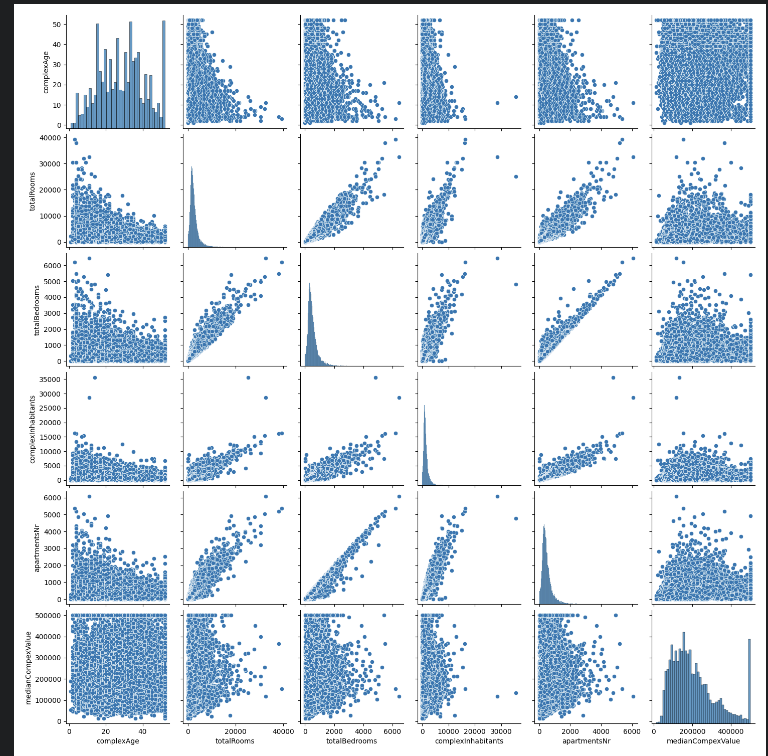

In [17]:
Image(filename="./results/6.png") 

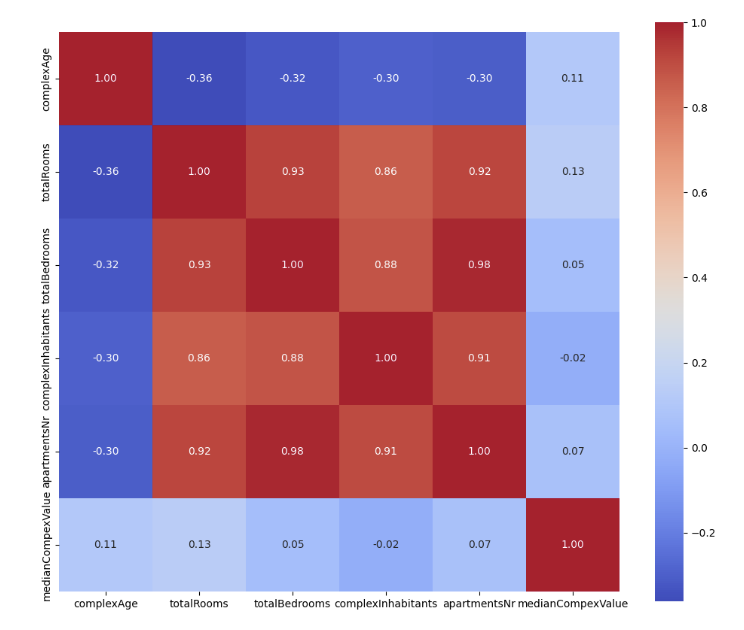

In [18]:
 Image(filename="./results/7.png") 

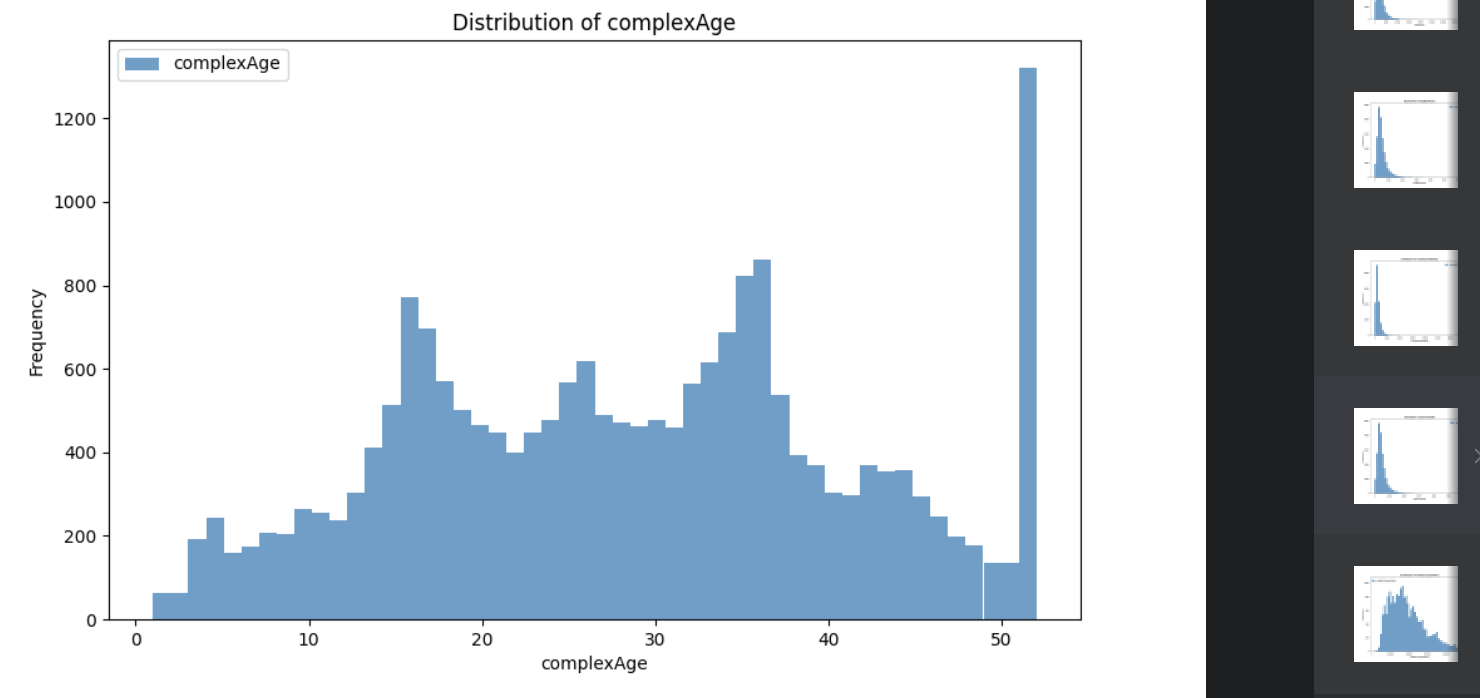

In [19]:
 Image(filename="./results/8.png") 

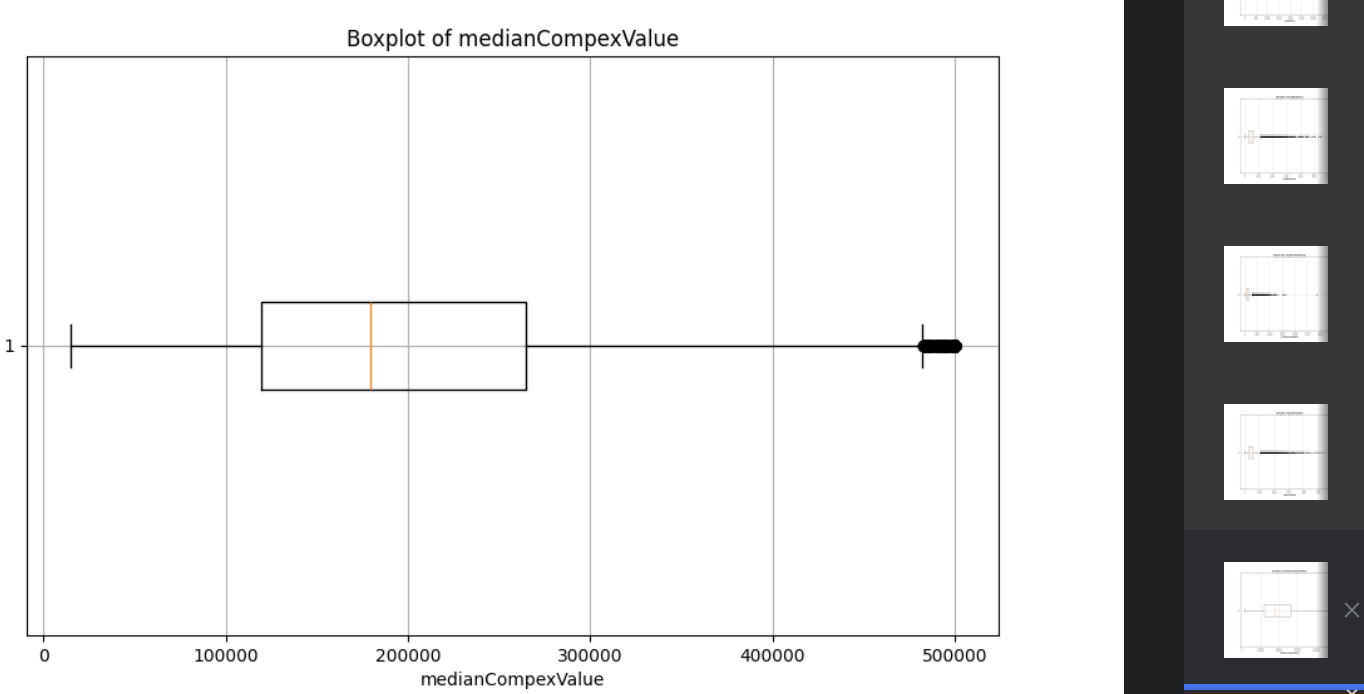

In [20]:
 Image(filename="./results/9.png") 

## Task 1 - Cleanse the data if necessary.

In [ ]:
def clean_data(data_set):

    interested_columns = ['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr', 'medianCompexValue']

    numeric_columns = data_set[interested_columns].select_dtypes(include=['float64', 'int64']).columns
    # For each numeric column, replace the missing values with the median
    for column in numeric_columns:
        data_set[column] = data_set[column].fillna(data_set[column].median())

    # For each categorical column, replace the missing values with the mod
    categorical_columns = data_set[interested_columns].select_dtypes(include=['object']).columns

    for column in categorical_columns:
        data_set[column].fillna(data_set[column].mode()[0], inplace=True)

    # Remove columns where more than 50% of values are missing
    threshold = len(data_set) * 0.5
    data_set.dropna(thresh=threshold, axis=1, inplace=True)

    # Remove rows that have missing values after you've dealt with most of the missing values
    data_set.dropna(inplace=True)

    return data_set

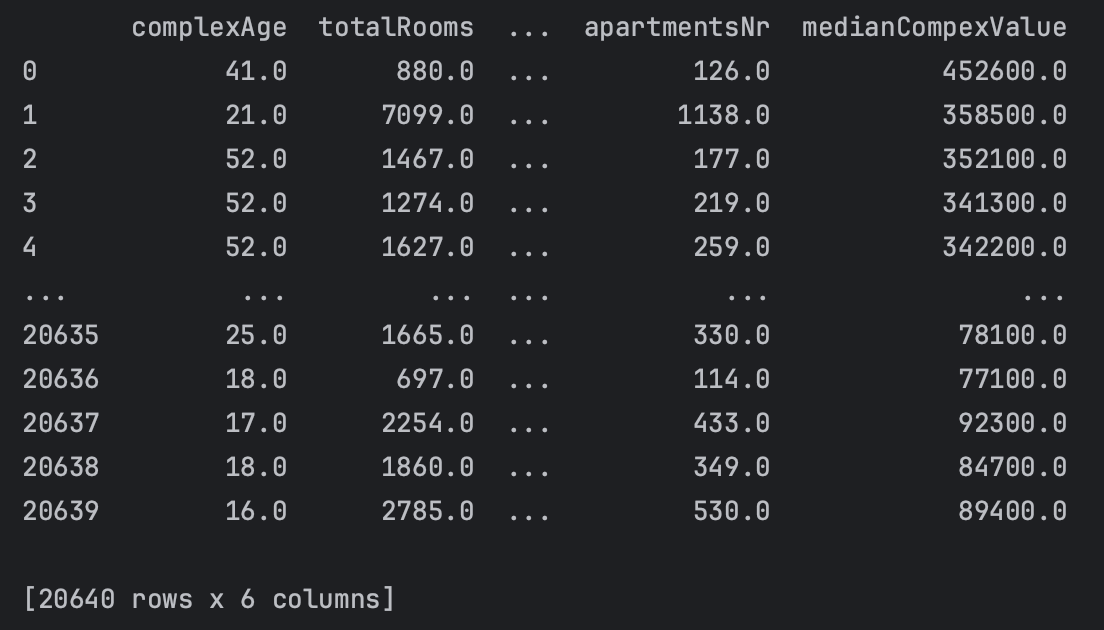

In [21]:
 Image(filename="./results/10.png") 

## Task 2 - Train your model by applying linear regression.

In [ ]:
def linear_regression_analysis(data_set_clean):
    x = data_set_clean.drop('medianCompexValue', axis=1)
    y = data_set_clean['medianCompexValue']

    # Split the dataset into training (80%) and testing (20%) sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model = LinearRegression()
   
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"Training Mean Squared Error (MSE): {train_mse}")
    print(f"Test Mean Squared Error (MSE): {test_mse}")
    print(f"Training R-squared Score: {train_r2}")
    print(f"Test R-squared Score: {test_r2}")

    plt.scatter(y_test, y_test_pred)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Actual vs Predicted values')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.show()

    metrics1 = ['Training MSE', 'Test MSE']
    values1 = [train_mse, test_mse]
    metrics2 = ['Training R²', 'Test R²']
    values2 = [train_r2, test_r2]

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].bar(metrics1, values1, color=['blue', 'orange'])
    ax[0].set_title('Mean Squared Error (MSE)')
    ax[0].set_ylim(0, max(values1) + max(values1)*0.1)  # Adjust the y-axis limit for clarity

    ax[1].bar(metrics2, values2, color=['green', 'red'])
    ax[1].set_title('R-squared Score (R²)')
    ax[1].set_ylim(0, 1)  # The limit for R² should be between 0 and 1

    plt.show()

linear_regression_analysis(data_set_clean)

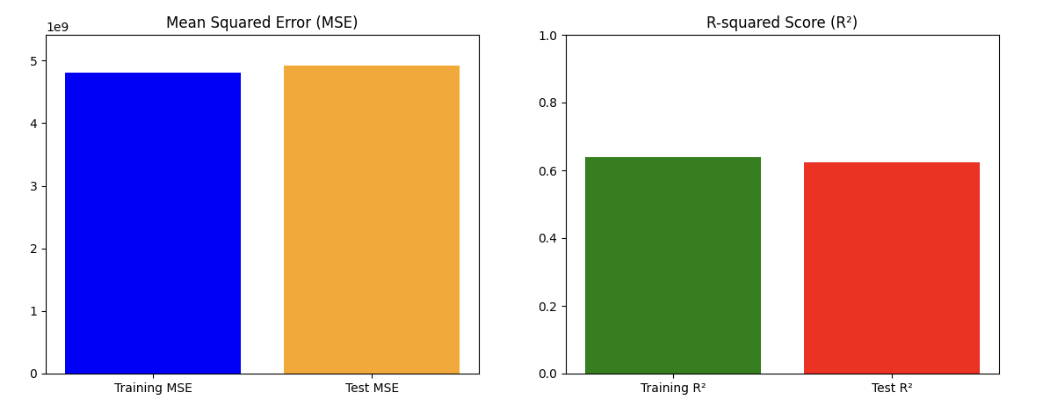

In [22]:
Image(filename="./results/11.png") 

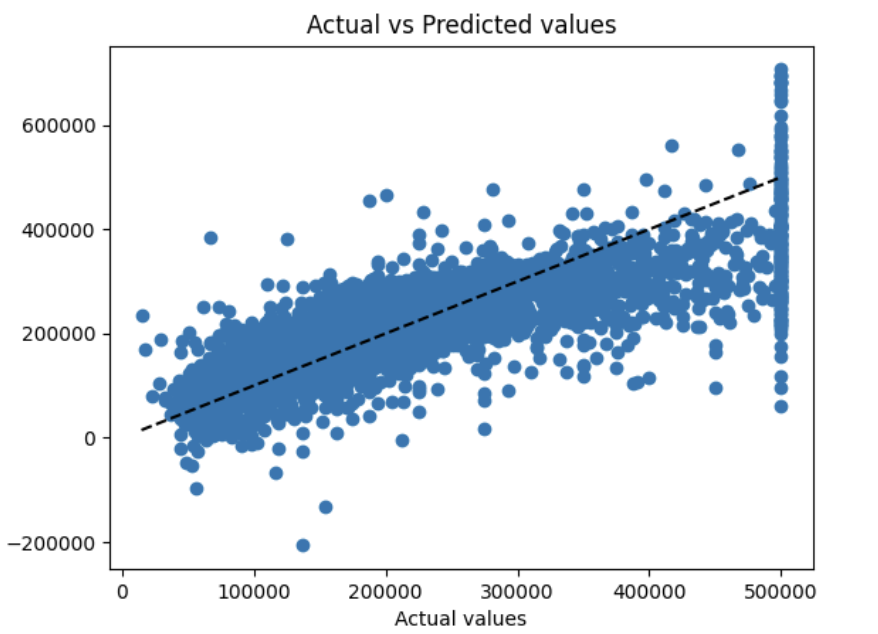

In [23]:
Image(filename="./results/12.png") 

## Task 3 -- Show the prediction power of your model by attempting to predict the price of a new house.

In [ ]:
feature_names = ['complexAge', 'totalRooms', 'totalBedrooms', 'complexInhabitants', 'apartmentsNr']

# New house features for prediction
new_house_features = {
    'complexAge': [10],
    'totalRooms': [3000],
    'totalBedrooms': [500],
    'complexInhabitants': [800],
    'apartmentsNr': [400]
}

# Convert the features into a pandas DataFrame
new_house_df = pd.DataFrame(new_house_features, columns=feature_names)

# Predict using the model
predicted_price = model.predict(new_house_df)

print(f"Predicted median complex value for the new house: {predicted_price[0]}")

# Plot the distribution of 'medianCompexValue'
plt.figure(figsize=(10, 6))
sns.histplot(data_set_interest['medianCompexValue'], kde=True, color="blue", label='Distribution of Prices')

# Mark the predicted price on the plot
plt.axvline(x=predicted_price[0], color='red', linestyle='--', linewidth=2, label='Predicted Price')

plt.xlabel('Median complex value')
plt.ylabel('Frequency')
plt.title('Distribution of median complex value with prediction')
plt.legend()

plt.show()

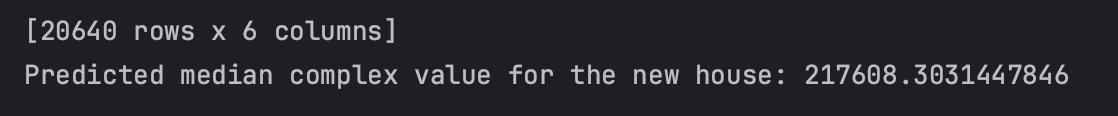

In [24]:
Image(filename="./results/13.png") 

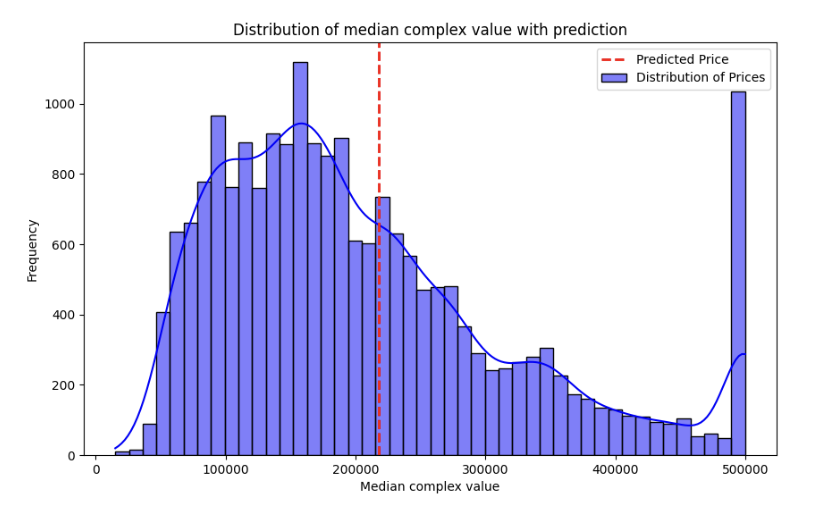

In [25]:
Image(filename="./results/14.png") 

In [ ]:
lt.figure(figsize=(18, 12))  # Adjust the figure size as needed

# Scatter plot: Age vs. Price
plt.subplot(2, 3, 1)
plt.scatter(data_set_clean['complexAge'], data_set_clean['medianCompexValue'], color="blue")
plt.title("Dependency between age and price")
plt.xlabel("Complex age")
plt.ylabel("Price in U/M")

# Scatter plot: Total Rooms vs. Price
plt.subplot(2, 3, 2)
plt.scatter(data_set_clean['totalRooms'],data_set_clean['medianCompexValue'], color="red")
plt.title("Dependency between number of rooms and price")
plt.xlabel("Number of rooms")
plt.ylabel("Price in U/M")

# Scatter plot: Total Bedrooms vs. Price
plt.subplot(2, 3, 3)
plt.scatter(data_set_clean['totalBedrooms'], data_set_clean['medianCompexValue'], color="green")
plt.title("Dependency between number of bathrooms and price")
plt.xlabel("Number of bathrooms")
plt.ylabel("Price in U/M")

# Scatter plot: Complex Inhabitants vs. Price
plt.subplot(2, 3, 4)
plt.scatter(data_set_clean['complexInhabitants'], data_set_clean['medianCompexValue'], color="yellow")
plt.title("Dependency between number of inhabitants and price")
plt.xlabel("Inhabitants in complex")
plt.ylabel("Price in U/M")

# Scatter plot: Apartments Number vs. Price
plt.subplot(2, 3, 5)
plt.scatter(data_set_clean['apartmentsNr'], data_set_clean['medianCompexValue'], color="orange")
plt.title("Dependency between number of apartments and price")
plt.xlabel("Number of apartments in complex")
plt.ylabel("Price in U/M")

# Distribution plot for 'medianCompexValue'
plt.subplot(2, 3, 6)
sns.histplot(data_set_clean['medianCompexValue'], color='r', kde=True)  # Added kde=True for kernel density estimate
plt.title("Distribution of price")
plt.xlabel("Price in U/M")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

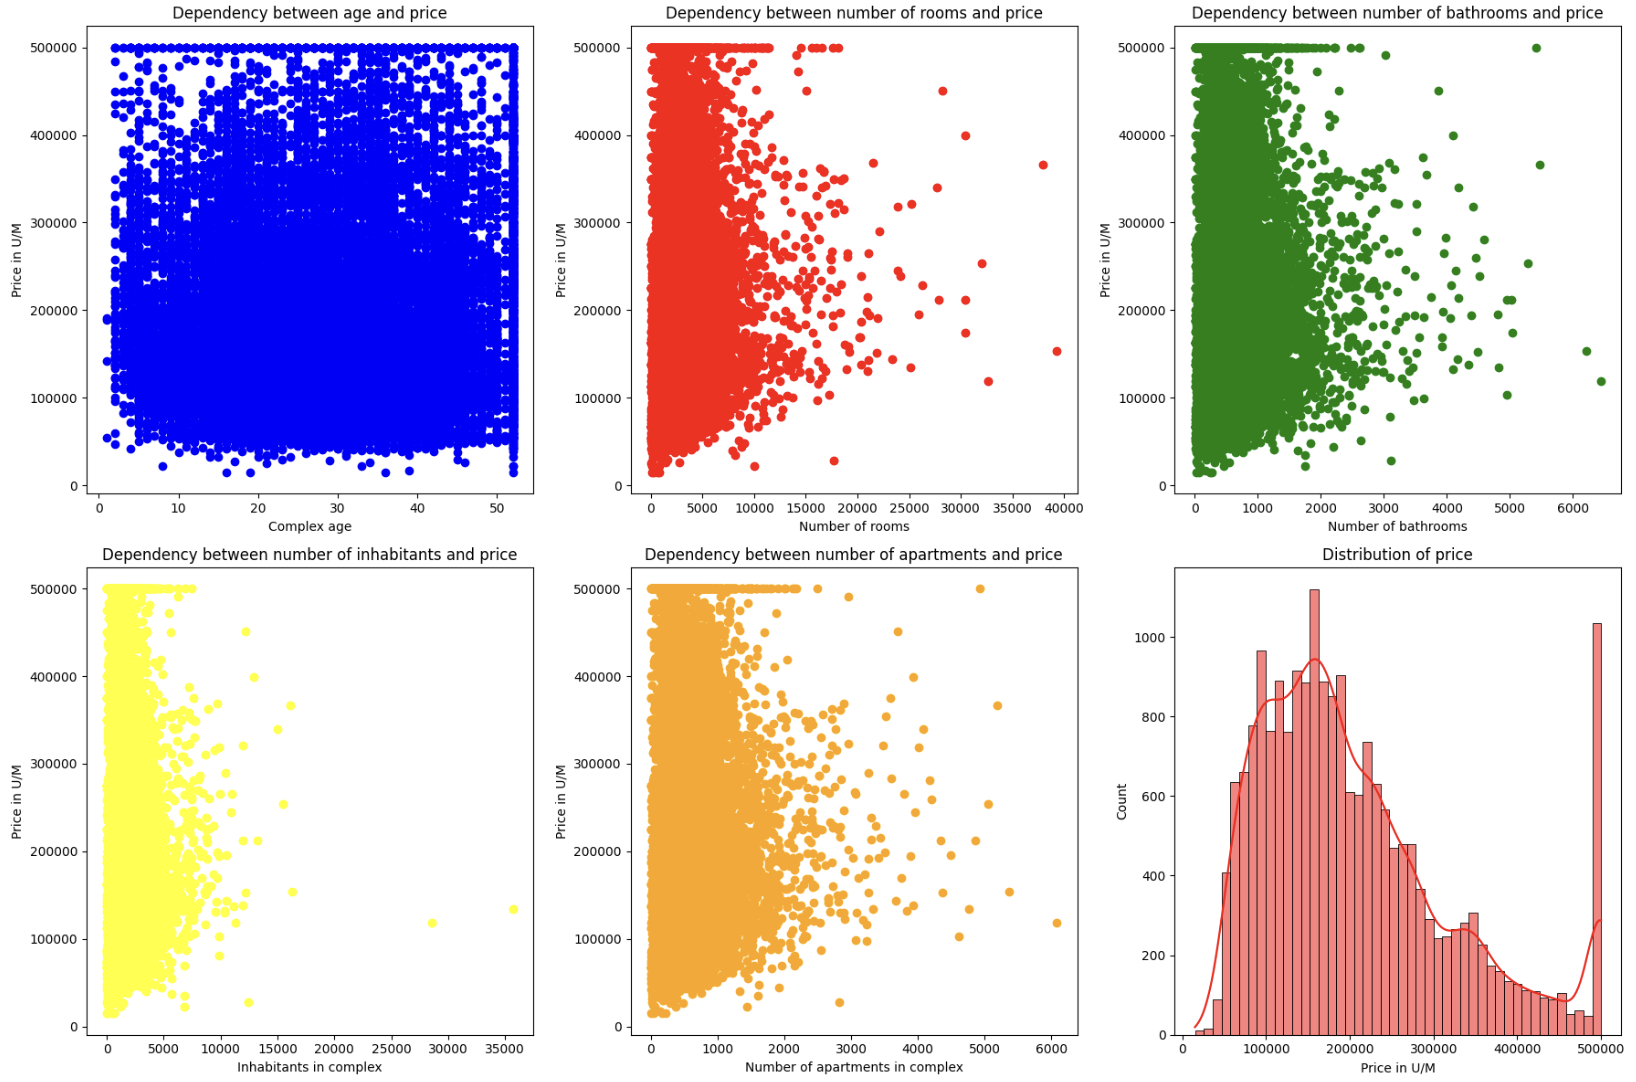

In [26]:
Image(filename="./results/15.png") 

## Task 4 -- Re-train your model. Use Ridge, Lasso or Elastic Net regularization.

In [ ]:
x = data_set_clean.drop('medianCompexValue', axis=1)
y = data_set_clean['medianCompexValue']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_train_pred = linear_reg.predict(x_train)
linear_test_pred = linear_reg.predict(x_test)
linear_train_mse = mean_squared_error(y_train, linear_train_pred)
linear_test_mse = mean_squared_error(y_test, linear_test_pred)
linear_train_r2 = r2_score(y_train, linear_train_pred)
linear_test_r2 = r2_score(y_test, linear_test_pred)

print("Linear Regression:")
print(f"Training MSE: {linear_train_mse}")
print(f"Test MSE: {linear_test_mse}")
print(f"Training R²: {linear_train_r2}")
print(f"Test R²: {linear_test_r2}")
print("\n")

# Ridge Regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
ridge_train_pred = ridge_reg.predict(x_train)
ridge_test_pred = ridge_reg.predict(x_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print("Ridge Regression:")
print(f"Training MSE: {ridge_train_mse}")
print(f"Test MSE: {ridge_test_mse}")
print(f"Training R²: {ridge_train_r2}")
print(f"Test R²: {ridge_test_r2}")
print("\n")

# Lasso Regression model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
lasso_train_pred = lasso_reg.predict(x_train)
lasso_test_pred = lasso_reg.predict(x_test)
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_test_pred)
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)

print("Lasso Regression:")
print(f"Training MSE: {lasso_train_mse}")
print(f"Test MSE: {lasso_test_mse}")
print(f"Training R²: {lasso_train_r2}")
print(f"Test R²: {lasso_test_r2}")
print("\n")

# Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)
elastic_train_pred = elastic_net.predict(x_train)
elastic_test_pred = elastic_net.predict(x_test)
elastic_train_mse = mean_squared_error(y_train, elastic_train_pred)
elastic_test_mse = mean_squared_error(y_test, elastic_test_pred)
elastic_train_r2 = r2_score(y_train, elastic_train_pred)
elastic_test_r2 = r2_score(y_test, elastic_test_pred)

print("Elastic Net Regression:")
print(f"Training MSE: {elastic_train_mse}")
print(f"Test MSE: {elastic_test_mse}")
print(f"Training R²: {elastic_train_r2}")
print(f"Test R²: {elastic_test_r2}")

# Define a set of alpha values for Ridge regression
parameters = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

ridge = Ridge()
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train, y_train)

# Best parameters and MSE
print("\nBest alpha:", ridge_regressor.best_params_)
print("Best MSE:", -ridge_regressor.best_score_)

# Extracting MSE and R² scores
train_mse_scores = [linear_train_mse, ridge_train_mse, lasso_train_mse, elastic_train_mse]
test_mse_scores = [linear_test_mse, ridge_test_mse, lasso_test_mse, elastic_test_mse]
train_r2_scores = [linear_train_r2, ridge_train_r2, lasso_train_r2, elastic_train_r2]
test_r2_scores = [linear_test_r2, ridge_test_r2, lasso_test_r2, elastic_test_r2]


## Task 5 -- Score and compare the scores of the models you have implemented. Interpret the result.

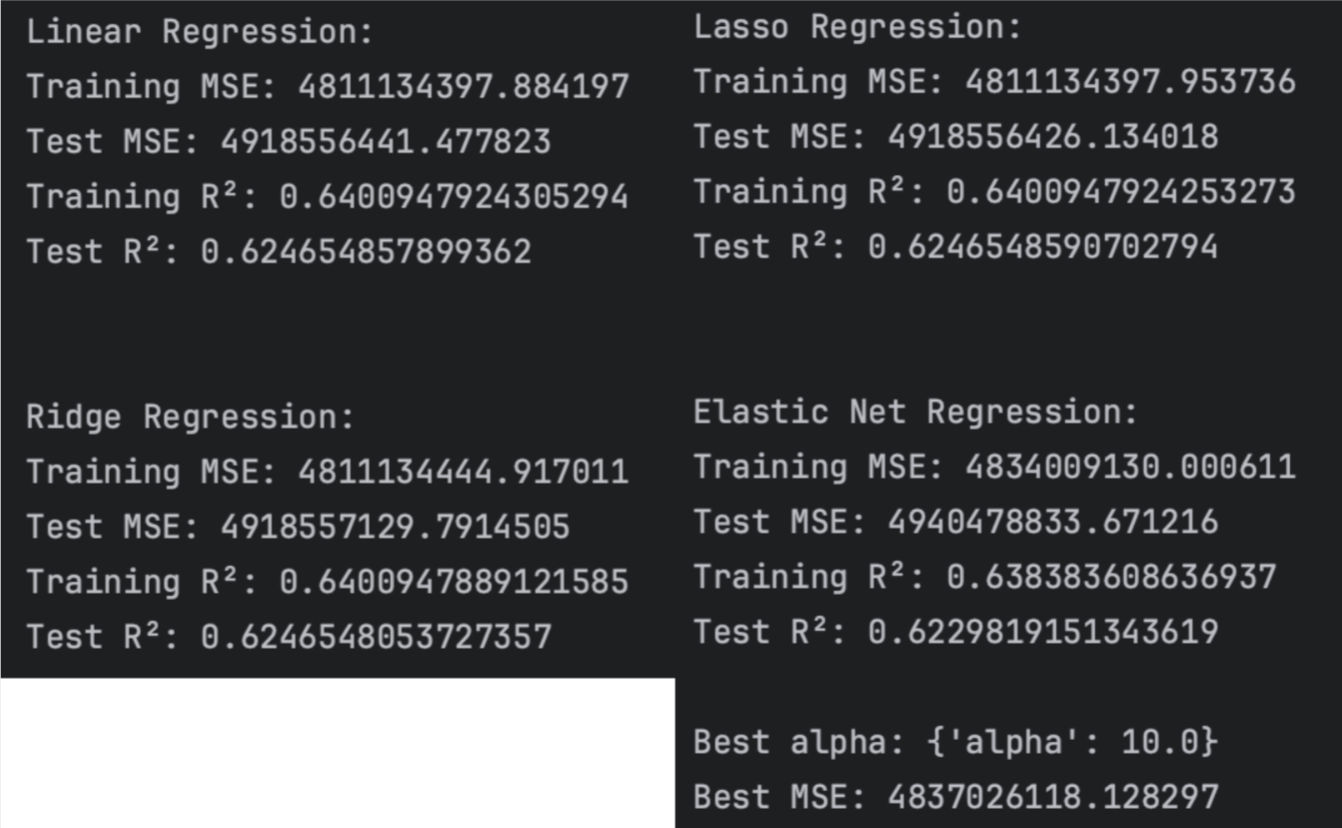

In [27]:
Image(filename="./results/16.png") 

In [ ]:
# Models names
models = ['Linear', 'Ridge', 'Lasso', 'Elastic Net']

# Plotting MSE scores
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bar_width = 0.35
index = range(len(models))
plt.bar(index, train_mse_scores, bar_width, color='b', alpha=0.5, label='Train MSE')
plt.bar([i + bar_width for i in index], test_mse_scores, bar_width, color='r', alpha=0.5, label='Test MSE')
plt.xlabel('Models')
plt.ylabel('MSE Scores')
plt.title('Comparison of MSE Scores')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Plotting R² scores
plt.subplot(1, 2, 2)
plt.bar(index, train_r2_scores, bar_width, color='b', alpha=0.5, label='Train R²')
plt.bar([i + bar_width for i in index], test_r2_scores, bar_width, color='r', alpha=0.5, label='Test R²')
plt.xlabel('Models')
plt.ylabel('R² Scores')
plt.title('Comparison of R² Scores')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

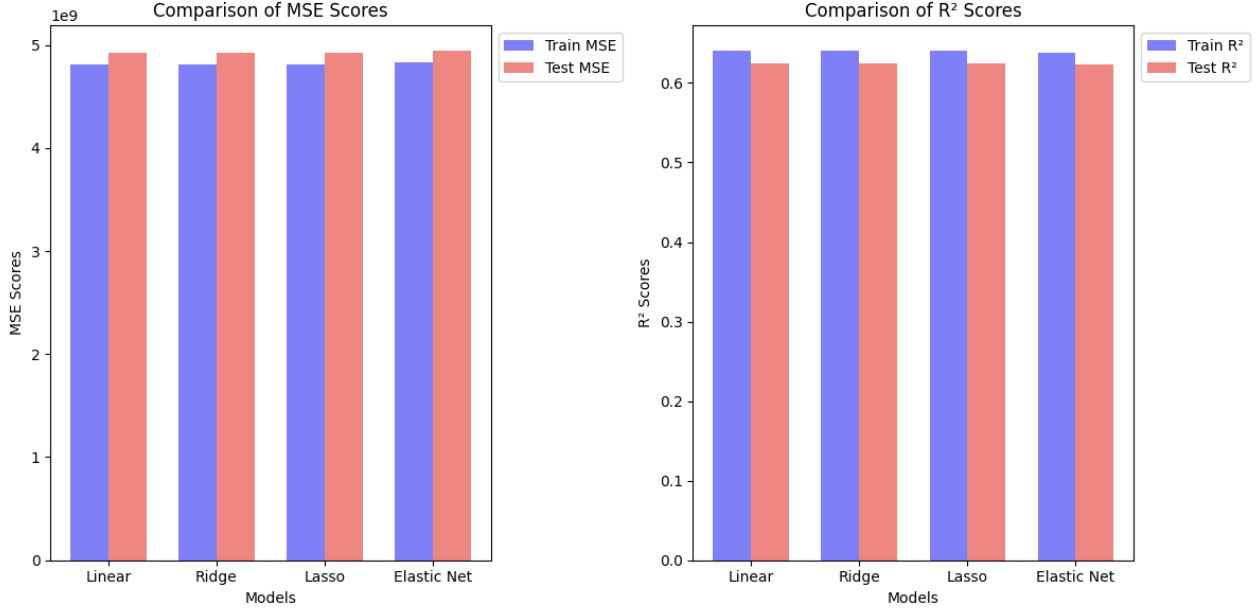

In [28]:
Image(filename="./results/17.png") 

## Conclusions:

In this lab, we studied Linear Regression based on the dataset of apartment complexes on the space station, with characteristics such as the age of the complex, the total number of rooms, the total number of bedrooms, the residents of the complex, the number of apartments and the median value of the complex.
For the data analysis, I got acquainted with the library functions available in the Python language (Pandas), thus the descriptive statistics were analyzed and the missing values were checked.
A linear regression model was built and trained using the cleaned data set to predict the median value of the complex based on the available characteristics of the apartment complexes.
The model was evaluated using metrics such as mean squared error (MSE) and R-squared score.
To improve predictive performance and manage potential overfitting, regularized regression techniques such as Ridge, Lasso, and Elastic Net regularization were applied. The performance of each model was evaluated and compared using metrics such as MSE and R-squared score and graphical representations.

## Bibliography:

[1] Introduction to Linear Regression. Available: https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/launching_into_ml/labs/intro_linear_regression.ipynb
[2] Lasso & Ridge Regression. Available: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/
[3] Regularization: Ridge, Lasso, and Elastic Net. Available: https://medium.com/@prabhsimran1099/regularization-ridge-lasso-and-elastic-net-779f71af215c#:~:text=Elastic%20Net%20Regression&text=Lasso%20works%20better%20when%20your,ridge%20will%20reduce%20their%20weight.
[4] Implementation of Lasso, Ridge and Elastic Net. Available: https://www.geeksforgeeks.org/implementation-of-lasso-ridge-and-elastic-net/
